# Homework 6

Luke Telfer  
October 11, 2020

In [11]:
# load packages
library(ggplot2)
library(pastecs)

## Part 1.A

Test the research hypothesis that age affects fungus infection for cottonwood tree data:



#### State the H0 and Ha:

- H0: sapling mean fungal count equals mature mean fungal count  
- Ha: sapling mean fungal count does not equal mean fungal count

In [12]:
# import cottonwood data
cwood <- read.csv('cottonwood_2013.csv')
str(cwood)

'data.frame':	80 obs. of  5 variables:
 $ Leaf  : int  76 71 27 69 65 35 63 78 79 59 ...
 $ Age   : Factor w/ 2 levels "mature","sap": 2 1 2 1 1 1 1 2 2 1 ...
 $ Length: num  18.8 11.9 14.5 12.2 11.8 ...
 $ Width : num  1.6 9.6 9.2 9.2 8.7 8.5 8.5 8.5 8.5 8.25 ...
 $ Fungus: int  0 21 1 8 1 0 2 1 3 21 ...


#### Test the assumption of homoscedasticity with the F-test:

Cannot reject the null hypothesis that the true ratio of variances is equal to 1 (p-value = 0.6107).

In [13]:
# testing homoscedasticity with F-test (var.test)
var.test(cwood$Fungus~cwood$Age)


	F test to compare two variances

data:  cwood$Fungus by cwood$Age
F = 0.84858, num df = 39, denom df = 39, p-value = 0.6107
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4488123 1.6044226
sample estimates:
ratio of variances 
          0.848578 


#### Graph the data to check for normality and do Shapiro-Wilks test:

Visual inspection of density qqnorm plots show very skewed data unlikely to be considered 'normal'.  Indeed, the Shapiro-Wilk test rejects the null hypothesis of normality for fungal counts of both saplings and mature trees.

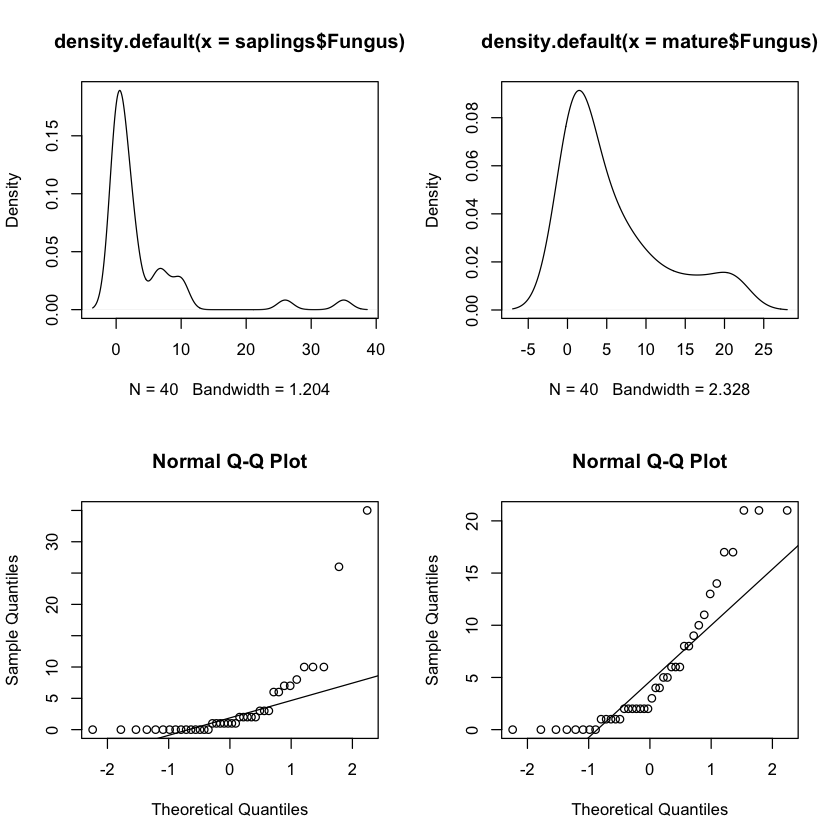

In [14]:
# plot data to inspect normality
saplings <- subset(cwood, cwood$Age=='sap')
mature <- subset(cwood, cwood$Age=='mature')
par(mfrow=c(2,2))
plot(density(saplings$Fungus))
plot(density(mature$Fungus))
qqnorm(saplings$Fungus)
qqline(saplings$Fungus)
qqnorm(mature$Fungus)
qqline(mature$Fungus)

In [15]:
# shapiro-wilks test for normality
tapply(cwood$Fungus, cwood$Age, FUN=shapiro.test)

$mature

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.81, p-value = 1.102e-05


$sap

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.56914, p-value = 1.215e-09



#### Run the t-test (anyway)



In [16]:
# run t-test
t.test(Fungus ~ Age, data=cwood, var.equal=T)


	Two Sample t-test

data:  Fungus by Age
t = 1.2766, df = 78, p-value = 0.2055
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.077128  4.927128
sample estimates:
mean in group mature    mean in group sap 
               5.700                3.775 


#### Can you reject the null? What is your conclusion?

According to the results of the t-test, the null cannot be rejected (p-value = 0.2055).  However, because the assumption of normality is violated, I cannot draw conclusions about the data with this test.  I need to either transform the data to make it normal or use a nonparametric test.

## Part 1.B

Log transform fungus infection data to make it more normal:


In [17]:
cwood$logfungus <- log10(cwood$Fungus + 1)

#### Test the assumption of homoscedasticity with the F-test on your log transformed data

Cannot reject the null hypothesis that the true ratio of variances is equal to 1 (p-value = 0.9312).

In [18]:
# testing homoscedasticity with F-test (var.test)
var.test(cwood$logfungus~cwood$Age)


	F test to compare two variances

data:  cwood$logfungus by cwood$Age
F = 1.0282, num df = 39, denom df = 39, p-value = 0.9312
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5438147 1.9440386
sample estimates:
ratio of variances 
          1.028201 


#### Graph the data to check for normality:

Based on the plots, the data appears to be much more normal, although the saplings still skew to the right a bit.  However, the Shapiro-Wilk test does reject the null hypothesis of normality for both ages.


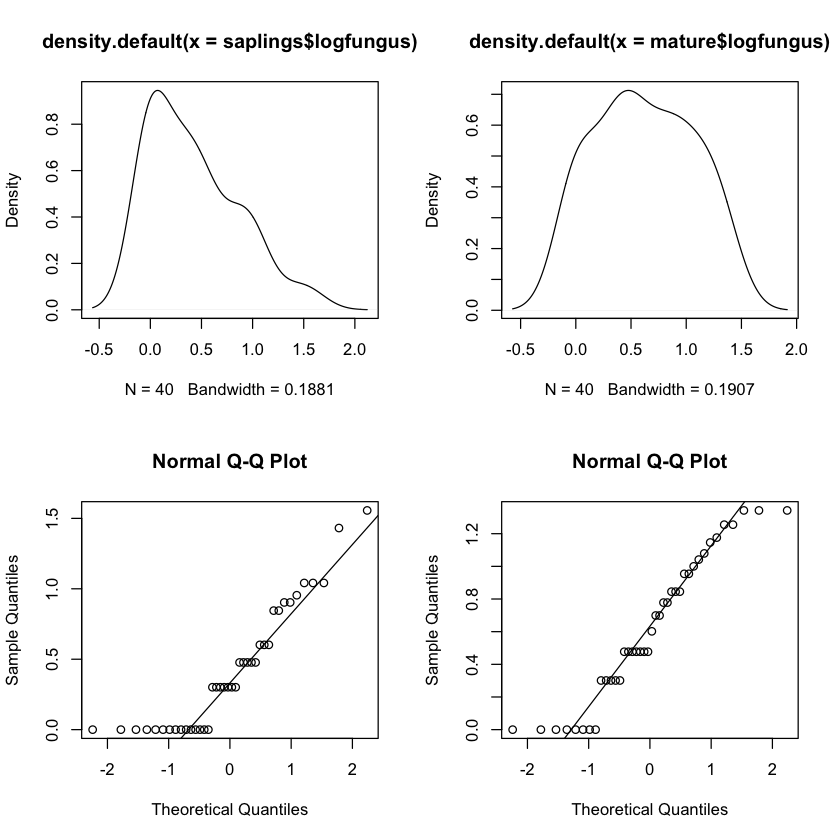

In [19]:
# plot data to inspect normality
saplings <- subset(cwood, cwood$Age=='sap')
mature <- subset(cwood, cwood$Age=='mature')
par(mfrow=c(2,2))
plot(density(saplings$logfungus))
plot(density(mature$logfungus))
qqnorm(saplings$logfungus)
qqline(saplings$logfungus)
qqnorm(mature$logfungus)
qqline(mature$logfungus)

In [20]:
# shapiro-wilks test for normality
tapply(cwood$logfungus, cwood$Age, FUN=shapiro.test)

$mature

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.92715, p-value = 0.01302


$sap

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.86204, p-value = 0.0001788



#### Run the t-test:

This time, the null hypothesis that the difference between means is equal to 0 is rejected.  However, I still have doubts about the validity of the normality assumption with this log-transformed data.


In [21]:
# run t-test
t.test(logfungus ~ Age, data=cwood, var.equal=T)


	Two Sample t-test

data:  logfungus by Age
t = 2.0235, df = 78, p-value = 0.04644
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003214775 0.394996604
sample estimates:
mean in group mature    mean in group sap 
           0.6206422            0.4215365 


## Part 1.C

Do a nonparametric 2-sample test of the same research hypothesis.


#### State the H0 and Ha:

- H0: the true median fungal count for saplings equals the true median fungal count for mature trees
- Ha: the true median fungal count for saplings does not equal the true median fungal count for mature trees

#### Run the analysis:

In [22]:
# run Wilcoxon Rank Sum test
wilcox.test(Fungus ~ Age, data=cwood)

Warning message in wilcox.test.default(x = c(21L, 8L, 1L, 0L, 2L, 21L, 10L, 1L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Fungus by Age
W = 1010, p-value = 0.04057
alternative hypothesis: true location shift is not equal to 0


#### Are your conclusions about rate of infection between mature and sapling trees different between the parametric and nonparametric tests? Explain.

My conclusions are that mature and sapling cottonwood trees have different rates of infection.  The two-sample t-test failed to reject the null hypothesis that the two groups had equal means.  However, the null hypothesis was rejected after log-transforming the data (bringing it closer to a normal distribution).  The nonparametric Wilcoxon Rank Sum test also rejected the null that the locations of the data (medians) were equal.  This suggests that there exists evidence that one age group (mature) had a greater rate of infection than the other (sapling).

#### Make a nice looking graph using ggplot2:

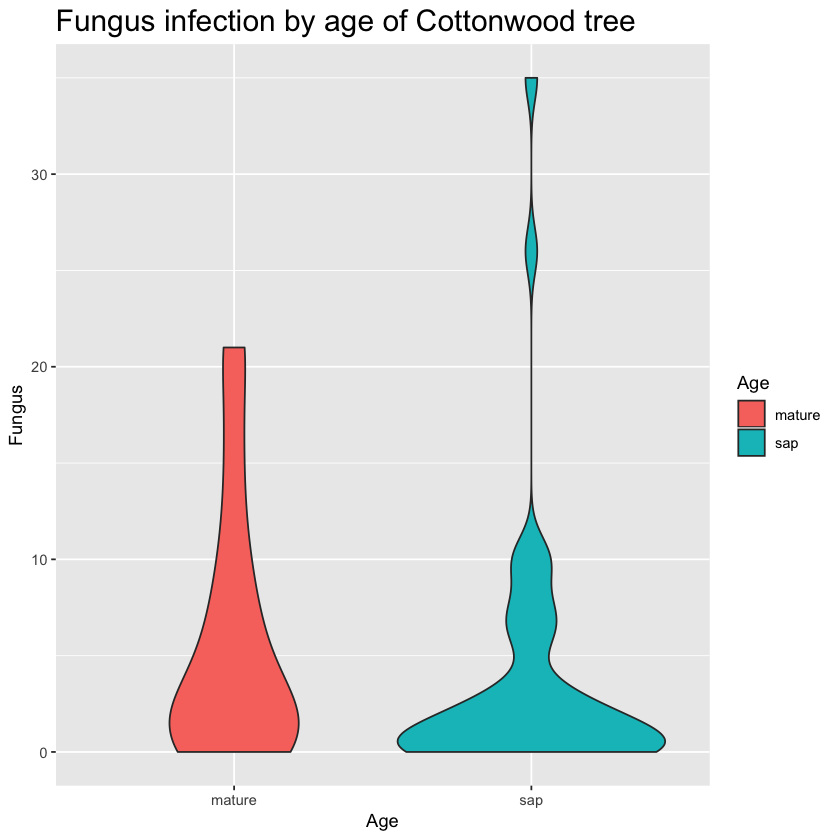

In [56]:
ggplot(cwood, aes(x=as.factor(Age), y=Fungus, fill=Age)) + 
geom_violin() + 
labs(x = 'Age', y = 'Fungus') + 
theme(plot.title = element_text(size=18)) +
ggtitle('Fungus infection by age of Cottonwood tree')

## Part 2.A

For our Cottonwood tree data, do the following for leaf width (use $\alpha$ = .05 and $\beta$ = 0.10).

#### Run a 2-sample t-test on H0: $\mu$(leaf width mature trees) = $\mu$(leaf width sapling trees)

In [23]:
# two-sample t-test
t.test(Width ~ Age, data=cwood, var.equal=T)


	Two Sample t-test

data:  Width by Age
t = 1.1599, df = 78, p-value = 0.2496
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3197013  1.2122013
sample estimates:
mean in group mature    mean in group sap 
             6.23125              5.78500 


#### Get the information you need on variance and means for each group using an R function.

In [24]:
# return descriptive statistics
by(cwood$Width, cwood$Age, stat.desc)

cwood$Age: mature
     nbr.val     nbr.null       nbr.na          min          max        range 
  40.0000000    0.0000000    0.0000000    2.7000000    9.6000000    6.9000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
 249.2500000    6.4000000    6.2312500    0.2599105    0.5257187    2.7021394 
     std.dev     coef.var 
   1.6438185    0.2638024 
------------------------------------------------------------ 
cwood$Age: sap
     nbr.val     nbr.null       nbr.na          min          max        range 
  40.0000000    0.0000000    0.0000000    1.6000000    9.2000000    7.6000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
 231.4000000    5.9000000    5.7850000    0.2836699    0.5737765    3.2187436 
     std.dev     coef.var 
   1.7940857    0.3101272 

In [25]:
# store var and mean for sapling and mature
sapling_var <- var(saplings$Width)
sapling_mean <- mean(saplings$Width)
mature_var <- var(mature$Width)
mature_mean <- mean(mature$Width)

#### From this information - Calculate the pooled variance.

In [45]:
# calculate pooled variance
sapling_df <- 39
sapling_ss <- sapling_var * sapling_df
mature_df <- 39
mature_ss <- mature_var * mature_df
pooled_var <- (sapling_ss + mature_ss)/(sapling_df + mature_df)
pooled_var

[1] 2.960442

## Part 2.B

The function `power.t.test` gives design specifications for a two-sample t-test with set power, alpha, sample size, delta, and sd (standard deviation of pooled variance). Play around with this code, each time leave a design spec out or try slightly changing things and watch the response.

In [27]:
# specify test values
pow <- c(0.5, 0.7, 0.9)
sig <- c(0.01, 0.05, 0.10)
delt <- c(0.5, 1, 2)
num <- c(5,20,100)
sd <- c(1,2,3)

In [28]:
# create dataframe
playtime <- data.frame(power=double(),
                      siglevel=double(),
                      delta=double(),
                      n=double(),
                      sd=double())

In [29]:
# find pow
for (i in sig) {
    for (d in delt) {
        for (n in num) {
            for (s in sd) {
                for (p in pow) {
                    p <- NULL
                    p <- power.t.test(n=n,delta=d,sd=s,sig.level=i,power=p)$power
                    playtime[nrow(playtime) + 1, ] <- c(p,i,d,n,s)
                }
            }
        }
    }
}

In [30]:
oldw <- getOption("warn")
options(warn = -1)
# find sig.level
for (i in sig) {
    for (d in delt) {
        for (n in num) {
            for (s in sd) {
                for (p in pow) {
                    i <- NULL
                    i <- power.t.test(n=n,delta=d,sd=s,sig.level=i,power=p)$sig.level
                    playtime[nrow(playtime) + 1, ] <- c(p,i,d,n,s)
                }
            }
        }
    }
}
options(warn = oldw)

In [31]:
# find delta
for (i in sig) {
    for (d in delt) {
        for (n in num) {
            for (s in sd) {
                for (p in pow) {
                    d <- NULL
                    d <- power.t.test(n=n,delta=d,sd=s,sig.level=i,power=p)$delta
                    playtime[nrow(playtime) + 1, ] <- c(p,i,d,n,s)
                }
            }
        }
    }
}

In [32]:
# find n
for (i in sig) {
    for (d in delt) {
        for (n in num) {
            for (s in sd) {
                for (p in pow) {
                    n <- NULL
                    n <- power.t.test(n=n,delta=d,sd=s,sig.level=i,power=p)$n
                    playtime[nrow(playtime) + 1, ] <- c(p,i,d,n,s)
                }
            }
        }
    }
}

In [33]:
# find sd
for (i in sig) {
    for (d in delt) {
        for (n in num) {
            for (s in sd) {
                for (p in pow) {
                    s <- NULL
                    s <- power.t.test(n=n,delta=d,sd=s,sig.level=i,power=p)$sd
                    playtime[nrow(playtime) + 1, ] <- c(p,i,d,n,s)
                }
            }
        }
    }
}

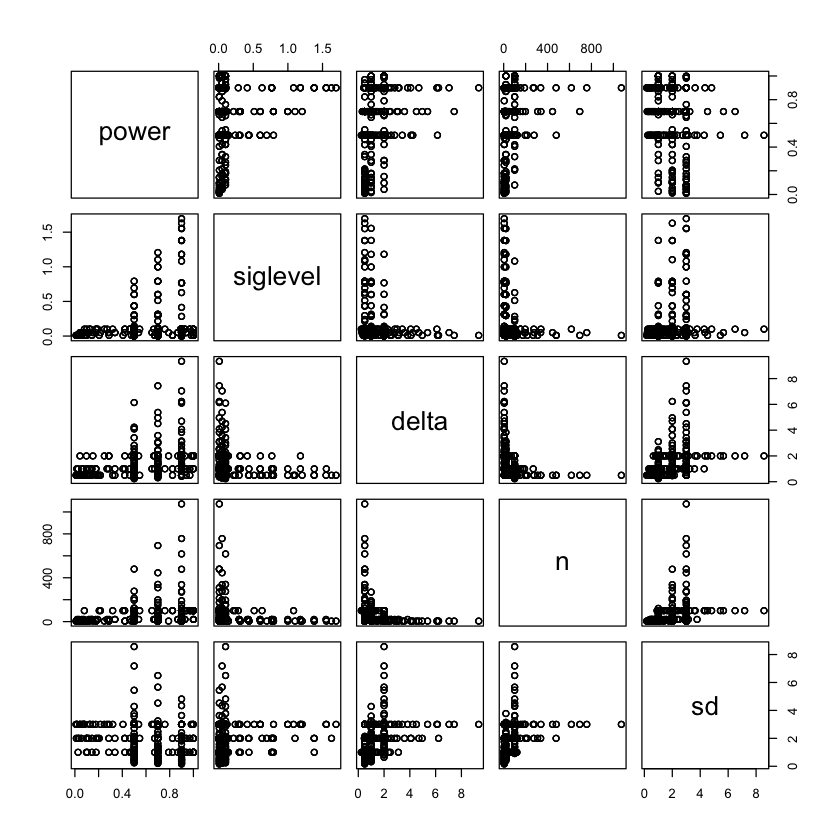

In [46]:
# plot results
plot(playtime)

#### Discuss the relationship between n, alpha, beta, sd, and power as you observe it.

* beta (1 - power) decreases with +alpha, +delta, +n, and -sd.
* alpha decreases with +beta, +delta, +n, and -sd.
* delta decreases with +beta, +alpha, +n, and -sd.
* n decreases with +beta, +alpha, +delta, and -sd.
* sd decreases with -beta, -alpha, -delta and -n.

There are certain tradeoffs between specifications.  For example, decreasing alpha (probability of making a type I error) generally costs an increase in beta (probability of making a type II error) and vice versa.  A greater sample size reduces the probability of making either error, allows for the detection of smaller true differences between means and decreases the pooled variation.  The directional tradeoff between any pair of specifications is fairly intuitive.

## Part 3.A

Is there a correlation between chiton length and width? Run a parametric correlation analysis on the following data and make sure to check assumptions of bivariate normality by running a Shapiro-Wilk test on length and width (note: tapply will not work here).

In [43]:
# import chiton data and quick look
chiton <- read.csv('chiton.csv')
str(chiton)

'data.frame':	10 obs. of  3 variables:
 $ chiton: Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ length: num  10.7 11 9.5 11 10.3 10.7 9.9 10.6 10 12
 $ width : num  5.8 6 5 6 5.3 5.8 5.2 5.7 5.3 6.3


In [40]:
# normality tests for length and width:
shapiro.test(chiton$length)
shapiro.test(chiton$width)


	Shapiro-Wilk normality test

data:  chiton$length
W = 0.95892, p-value = 0.7735



	Shapiro-Wilk normality test

data:  chiton$width
W = 0.94652, p-value = 0.6275


In [41]:
# parametric correlation test (pearson):
cor.test(~ length + width, data=chiton, conf.level=0.95)


	Pearson's product-moment correlation

data:  length and width
t = 10.562, df = 8, p-value = 5.635e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8584361 0.9921615
sample estimates:
      cor 
0.9659645 


#### How are the data organized in the file?

Each row is a chiton observation with three variables: chiton (which provides a name for the observation), length (in unknown units), and width (in unknown units).

#### What is the null?

The null hypothesis is that the true correlation is equal to 0.

#### After looking at your output, discuss the strength and direction of the correlation and whether of not the correlation is significant. What does a significant correlation mean?

Chiton length and width have a strong (0.966) positive correlation.  In other words, as one of the variables increases, the other also increases.  The correlation coefficient ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation), where 0 means no correlation whatsoever. The closer the correlation coefficient is to an endmember (-1 or 1) the more significant the correlation.

#### Make a graph of your data

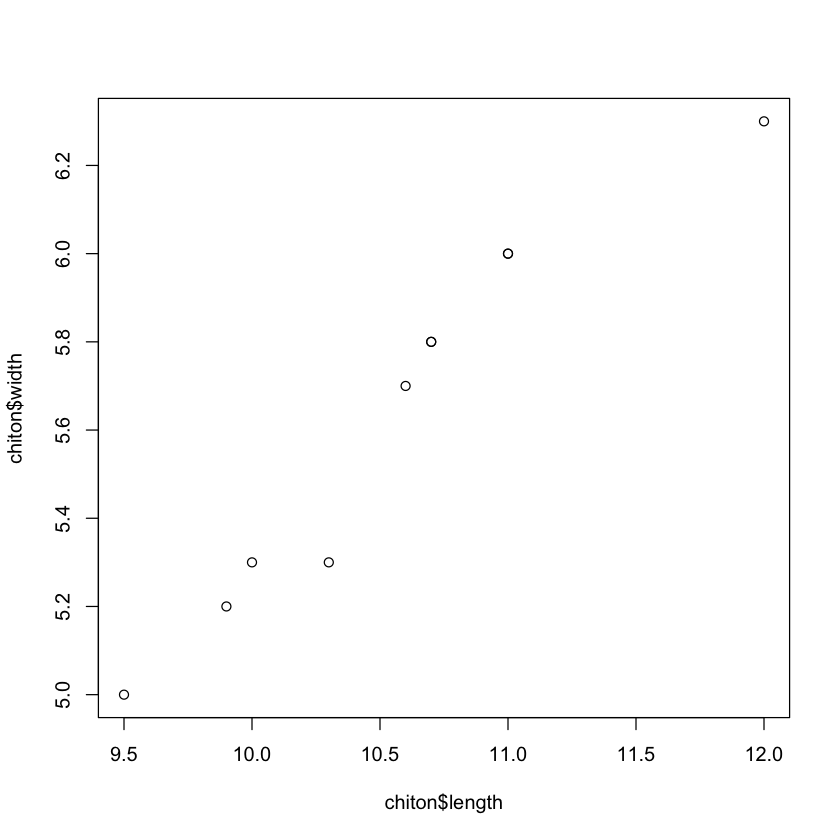

In [44]:
plot(chiton$length,chiton$width)